In [1]:
# pip install nltk
import requests
from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import defaultdict
import time
# nltk.download('gutenberg')
# nltk.download('all')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jieba

In [12]:
# Function to remove HTML tags
def remove_html_tags(text):
    return re.sub('<[^<]+?>', '', text)

# Function to perform NLP preprocessing
def preprocess_text(text):
    # Lowercase all words
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Porter Stemming
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Function to perform NLP preprocessing ZH text
def preprocess_text_zh(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize the text
    words = jieba.cut(text)
    # Remove stop words
    stop_words = set(stopwords.words('chinese'))
    words = [word for word in words if word not in stop_words]
    return words

In [13]:
# Get the HTML content from the URL
url = "https://boxnovel.com/novel/outside-of-time/chapter-1/"
res = requests.get(url)
html_content = res.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')


In [14]:
docs_taken = 0
docu_text = []
url = "https://boxnovel.com/novel/outside-of-time/chapter-1/"
while docs_taken < 10:
    # Get the HTML content from the URL
    chapter_text = ""
    res = requests.get(url)
    html_content = res.text

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    next_chap = soup.find("div", class_ = "nav-next")
    url = next_chap.find("a")["href"]
   
    docs_taken = docs_taken + 1
    
    texts = soup.find_all("div", class_="dib pr")
    for text in texts:
        chapter_text = chapter_text + (text.find("p").text)
    docu_text.append(preprocess_text(chapter_text))
    time.sleep(1)
#print(docu_text)

In [15]:
inverted_index = defaultdict(list)
for idx, doc in enumerate(docu_text):
    for word in doc:
        inverted_index[word].append(idx)

In [16]:
def get_word_frequency_from_inverted_index(inverted_index):
    # Initialize an empty dictionary to store the word frequencies
    word_frequency = defaultdict(int)

    # Iterate over the inverted index
    for word, doc_indices in inverted_index.items():
        # Count the number of documents that contain the word
        frequency = len(doc_indices)
        # Store the frequency in the word frequency dictionary
        word_frequency[word] = frequency

    # Return the word frequency dictionary
    return dict(word_frequency)

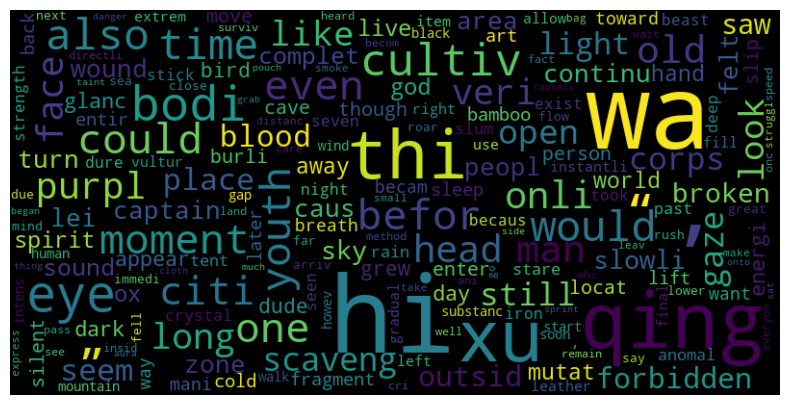

In [17]:
# Get the word frequency dictionary from the inverted index
word_frequency = get_word_frequency_from_inverted_index(inverted_index)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate_from_frequencies(word_frequency)

# Plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [4]:
docs_taken = 0
docu_text_zh = []
url = "https://read.qidian.com/chapter/EC3OXXDqjiw1/BHMK5Uz2Vqsex0RJOkJclQ2/"
while docs_taken < 10:
    # Get the HTML content from the URL
    chapter_text = ""
    res = requests.get(url)
    html_content = res.text

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    next_chap = soup.find("div", class_ = "chapter-control dib-wrap")
    url = "https:" + next_chap.find("a", {"id": "j_chapterNext"})["href"]
   
    docs_taken = docs_taken + 1
    
    # Parse the HTML content using BeautifulSoup
    main = soup.find("div", {"class": "main-text-wrap"})
    second = main.find("div", {"class": "read-content j_readContent"})
    texts = second.find_all("p")
    
    for text in texts:
        chapter_text = chapter_text + (text.text)
    docu_text_zh.append(preprocess_text_zh(chapter_text))
    time.sleep(1)


Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\advai\AppData\Local\Temp\jieba.cache
Loading model cost 0.551 seconds.
Prefix dict has been built successfully.


In [5]:
inverted_index_zh = defaultdict(list)
for idx, doc in enumerate(docu_text_zh):
    for word in doc:
        inverted_index_zh[word].append(idx)

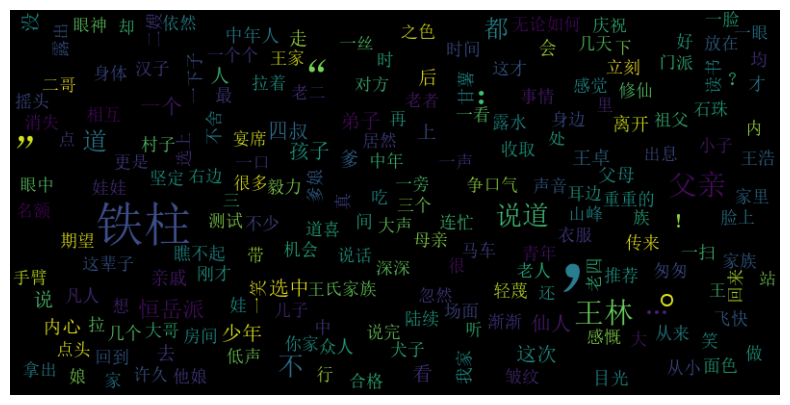

In [11]:
# Get the word frequency dictionary from the inverted index
word_frequency_zh = get_word_frequency_from_inverted_index(inverted_index_zh)

# Generate the wordcloud
wordcloud_zh = WordCloud(font_path='C:\\WINDOWS\\FONTS\\SIMSUN.ttc', width=800, height=400, random_state=21, max_font_size=110).generate_from_frequencies(word_frequency_zh)

# Plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_zh, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
# To Do docu to text, can use libraries like
# pyPDF2, odfpy, python-docx etc to extract text
# Then same as above